#                       SVR (Support Vector Regressor)
 1.Here the problem are non linear so we are using SVR as 'rbf'.

In [1]:
# importing the library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
# we have to reshape single feature(1D array) to 2d array using this.
# otherwise we will  get error in feature scaling

y = y.reshape(-1,1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
# splitting data into train_test_split
"""
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)"""


'\nfrom sklearn.model_selection import train_test_split\nX_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)'

In [8]:
# fitting SVR on trainset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')

regressor.fit(X,y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
# Predicting a new result

y_Pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([6.5]).reshape(-1,1))))

# Note: Scale back the data to the original representation = inververse_transfrom 

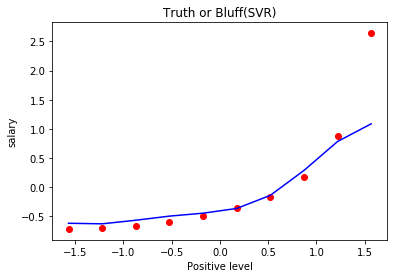

In [10]:
# visualize the SVR result

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Positive level')
plt.ylabel('salary')
plt.show()